# Bank Customer Churn Prediction

**It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.**

**Bases upon independent feature we have to predict the customer will exited or not.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [4]:
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
data.shape

(10000, 14)

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='CreditScore', ylabel='Density'>

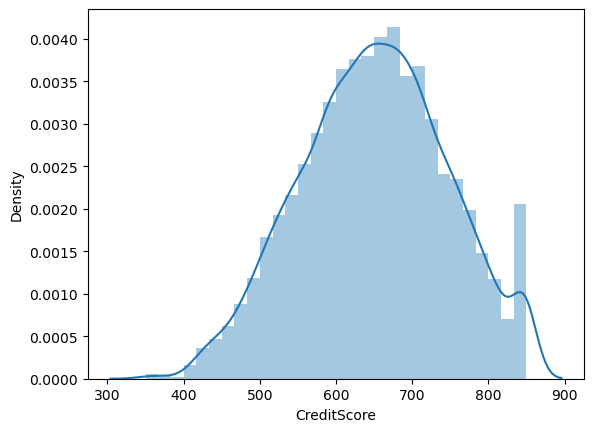

In [12]:
sns.distplot(data['CreditScore'], bins=30)

<Axes: xlabel='Balance', ylabel='Density'>

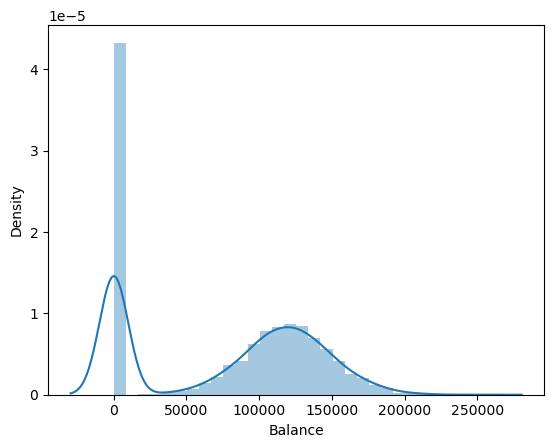

In [13]:
sns.distplot(data['Balance'], bins=30)

 In balance many accounts has zero balance

<Axes: xlabel='Gender', ylabel='Exited'>

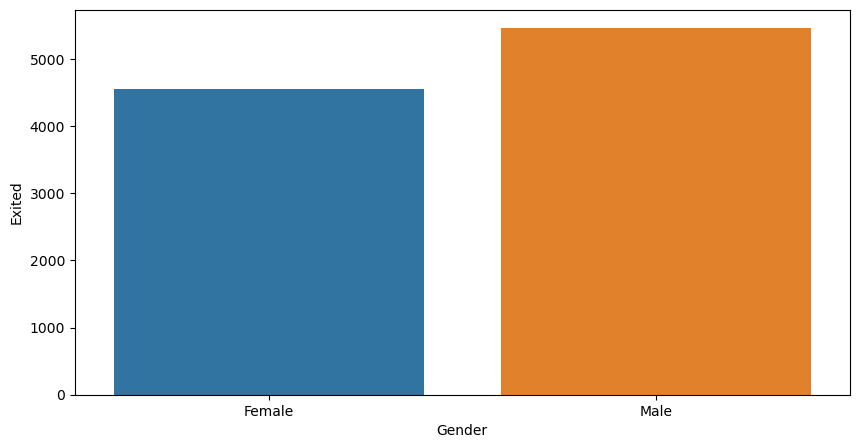

In [14]:
prdata=data.groupby('Gender').agg({'Exited':'count'}).reset_index()
fig, (ax1) = plt.subplots(1,1,figsize=(10, 5))
sns.barplot(x='Gender', y='Exited', data = prdata, ax=ax1)

<Axes: xlabel='Geography', ylabel='Exited'>

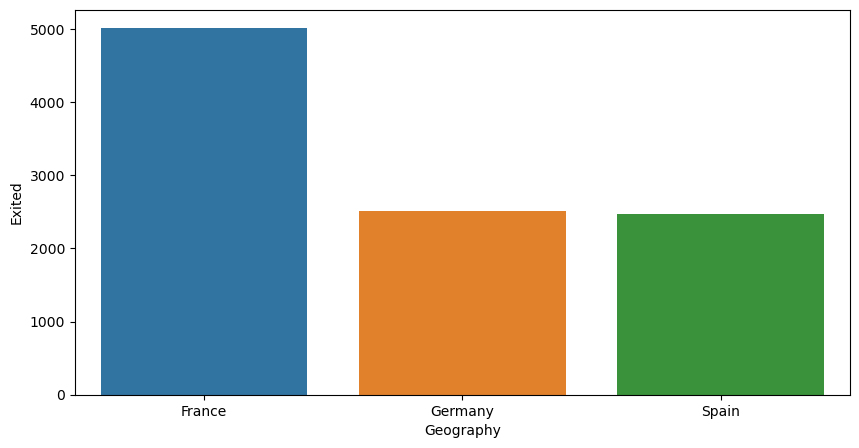

In [15]:
prdata=data.groupby('Geography').agg({'Exited':'count'}).reset_index()
fig, (ax1) = plt.subplots(1,1,figsize=(10, 5))
sns.barplot(x='Geography', y='Exited', data = prdata, ax=ax1)

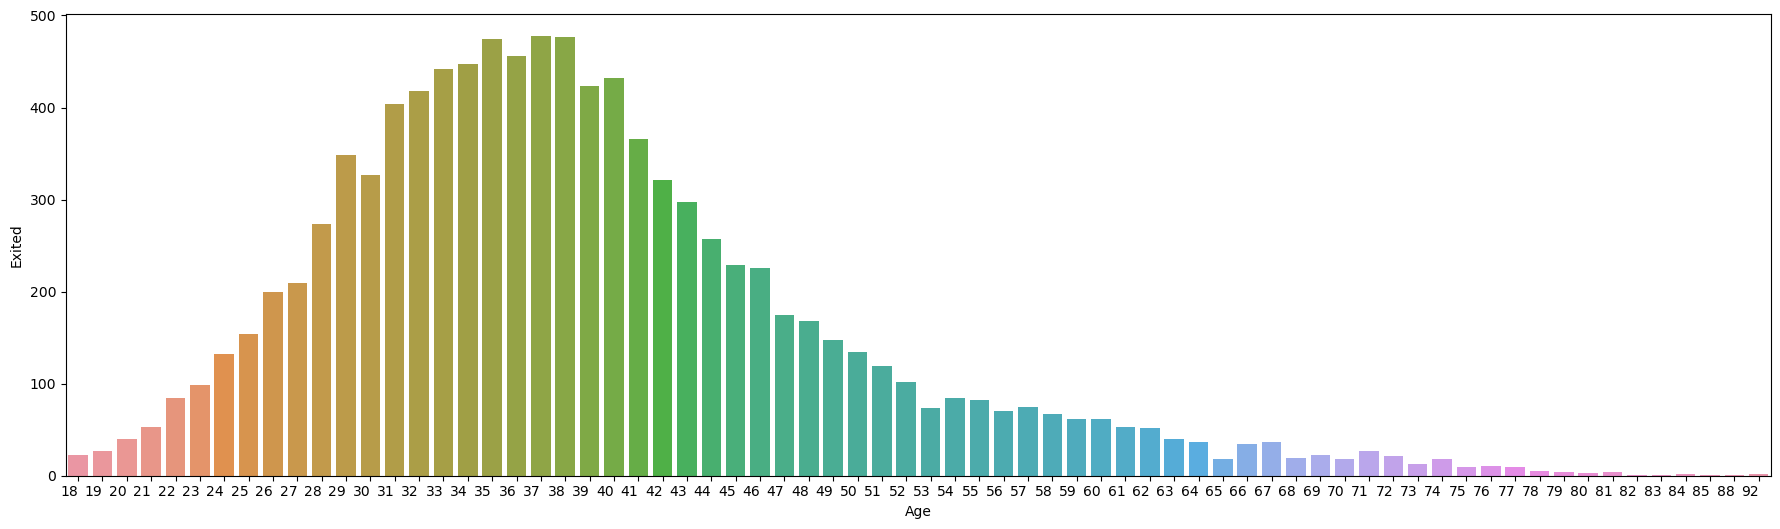

In [16]:
#checking the whitch age reported more fraud:
da=data.groupby('Age').agg({'Exited':'count'}).reset_index()

fig, (ax1) = plt.subplots(1,1,figsize=(22, 6))
graph =sns.barplot(x='Age', y='Exited', data = da, ax=ax1)

graph.set_xticklabels(graph.get_xticklabels(),
                    rotation=0,
                    horizontalalignment='right'
                    );

**Age 35,37,38 are exited more**

<Axes: ylabel='Exited'>

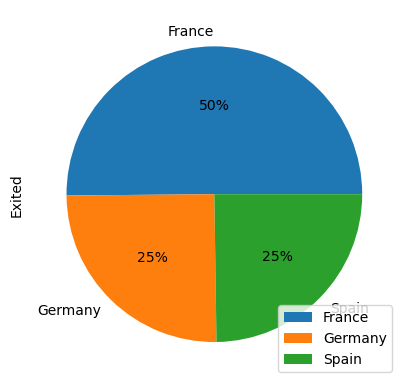

In [17]:
data.groupby(['Geography']).count().plot(kind='pie', y='Exited', autopct='%1.0f%%')

In [18]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [19]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [20]:
X = data.drop(["Exited"], axis = 1)
y = data["Exited"]

In [21]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123,stratify=y)

In [23]:
#defining numerical columns in data:
numeric_columns=X_train.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [24]:
#defining categorical columns in data:
cat_columns=X_train.select_dtypes(['category','object']).columns
cat_columns

Index(['Geography', 'Gender'], dtype='object')

In [25]:
# Importing the required classifiers for model building:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [26]:
#standardscaler for numerical columns
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])

X_train_num = pd.DataFrame(scaler.transform(X_train[numeric_columns]), columns=numeric_columns)
X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns)

In [27]:
#ohe = OneHotEncoder()
ohe = OneHotEncoder(handle_unknown='ignore', drop = "first")
ohe.fit(X_train[cat_columns])

columns_ohe = list(ohe.get_feature_names_out(cat_columns))

In [28]:
X_train_cat = ohe.transform(X_train[cat_columns])
X_test_cat  = ohe.transform(X_test[cat_columns])

In [29]:
X_train_cat = pd.DataFrame(X_train_cat.todense(), columns=columns_ohe)
X_test_cat  = pd.DataFrame(X_test_cat.todense(), columns=columns_ohe)

In [30]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [31]:
#checking the shape of train and test:
print(X_train.shape, X_test.shape)

(7000, 11) (3000, 11)


In [32]:
scores = pd.DataFrame(columns=['Model', 'Train_Recall', 'Train_Precision', 'Train_F1_Score', 
                               'Test_Recall', 'Test_Precision', 'Test_F1_Score'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_recall    = recall_score(train_actual, train_predicted, average="weighted")
    train_precision = precision_score(train_actual, train_predicted, average="weighted")
    train_f1score   = f1_score(train_actual, train_predicted, average="weighted")
    
    test_recall     = recall_score(test_actual, test_predicted, average="weighted")
    test_precision  = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score    = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                train_recall, train_precision, train_f1score,
                                                test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [33]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logistic_model = LogisticRegression(solver='liblinear',random_state=1230)

In [36]:
Model=logistic_model.fit(X_train,y_train)

In [37]:
y_train_Pred_log = logistic_model.predict(X_train)
y_test_Pred_log = logistic_model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, y_test_Pred_log)
print(cmr)

[[2278  111]
 [ 476  135]]


In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_Pred_log)

0.5872431541455347

In [40]:
classifcation_report_train_test(y_train, y_train_Pred_log, y_test, y_test_Pred_log)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8298    0.9627    0.8913      5574
           1     0.6098    0.2279    0.3318      1426

    accuracy                         0.8130      7000
   macro avg     0.7198    0.5953    0.6115      7000
weighted avg     0.7849    0.8130    0.7773      7000


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8272    0.9535    0.8859      2389
           1     0.5488    0.2209    0.3151       611

    accuracy                         0.8043      3000
   macro avg     0.6880    0.5872    0.6005      3000
weighted avg     0.7705    0.8043    0.7696      3000



In [41]:
scores=get_metrics(y_train,y_train_Pred_log,y_test,y_test_Pred_log,"Logistic",scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.813,0.784935,0.777313,0.804333,0.770464,0.769609


# RandomForestClassifier

In [42]:
rf = RandomForestClassifier()

In [43]:
rf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [44]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [45]:
classifcation_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999      5574
           1     1.0000    0.9993    0.9996      1426

    accuracy                         0.9999      7000
   macro avg     0.9999    0.9996    0.9998      7000
weighted avg     0.9999    0.9999    0.9999      7000


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8800    0.9636    0.9199      2389
           1     0.7734    0.4861    0.5970       611

    accuracy                         0.8663      3000
   macro avg     0.8267    0.7248    0.7584      3000
weighted avg     0.8583    0.8663    0.8541      3000



In [46]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, "RandomForest", scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.813000,0.784935,0.777313,0.804333,0.770464,0.769609
1,RandomForest,0.999857,0.999857,0.999857,0.866333,0.858272,0.854117


**Excited has imbalance data so using smote over sampling data**

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)

In [48]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [49]:
print(pd.value_counts(y_train_sm, normalize=True) * 100)

0    50.0
1    50.0
Name: Exited, dtype: float64


# RandomForestClassifier using smote

In [50]:
rfclf2 = RandomForestClassifier(class_weight='balanced')

In [51]:
rfclf2 = rfclf2.fit(X_train_sm, y_train_sm)

In [52]:
train_pred=rfclf2.predict(X_train_sm)
test_pred=rfclf2.predict(X_test)

In [53]:
classifcation_report_train_test(y_train_sm, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      5574
           1     1.0000    1.0000    1.0000      5574

    accuracy                         1.0000     11148
   macro avg     1.0000    1.0000    1.0000     11148
weighted avg     1.0000    1.0000    1.0000     11148


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9014    0.9184    0.9098      2389
           1     0.6555    0.6072    0.6304       611

    accuracy                         0.8550      3000
   macro avg     0.7784    0.7628    0.7701      3000
weighted avg     0.8513    0.8550    0.8529      3000



In [54]:
scores=get_metrics(y_train_sm,train_pred,y_test,test_pred,"Random forest_smote",scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.813000,0.784935,0.777313,0.804333,0.770464,0.769609
1,RandomForest,0.999857,0.999857,0.999857,0.866333,0.858272,0.854117
2,Random forest_smote,1.000000,1.000000,1.000000,0.855000,0.851311,0.852905


# GradientBoostingClassifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [57]:
%time GBM_model.fit(X_train, y_train)

CPU times: user 506 ms, sys: 2.74 ms, total: 508 ms
Wall time: 509 ms


GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [58]:
traingbc = GBM_model.predict(X_train_sm)
testgbc = GBM_model.predict(X_test)

In [59]:
classifcation_report_train_test(y_train_sm, traingbc, y_test, testgbc)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.6654    0.9700    0.7893      5574
           1     0.9447    0.5122    0.6643      5574

    accuracy                         0.7411     11148
   macro avg     0.8051    0.7411    0.7268     11148
weighted avg     0.8051    0.7411    0.7268     11148


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8868    0.9573    0.9207      2389
           1     0.7577    0.5221    0.6182       611

    accuracy                         0.8687      3000
   macro avg     0.8222    0.7397    0.7695      3000
weighted avg     0.8605    0.8687    0.8591      3000



In [60]:
scores = get_metrics(y_train_sm,traingbc, y_test, testgbc, "GBM_smote", scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.813000,0.784935,0.777313,0.804333,0.770464,0.769609
1,RandomForest,0.999857,0.999857,0.999857,0.866333,0.858272,0.854117
2,Random forest_smote,1.000000,1.000000,1.000000,0.855000,0.851311,0.852905
3,GBM_smote,0.741119,0.805067,0.726803,0.868667,0.860493,0.859088


# SVM

In [61]:
from sklearn import svm
from sklearn.datasets import make_classification

In [62]:
model = svm.SVC(kernel = 'linear', random_state = 0)

In [63]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [64]:
y=model.predict(X_test)
y2=model.predict(X_train)

In [65]:
classifcation_report_train_test(y_train, y2, y_test, y)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.7963    1.0000    0.8866      5574
           1     0.0000    0.0000    0.0000      1426

    accuracy                         0.7963      7000
   macro avg     0.3981    0.5000    0.4433      7000
weighted avg     0.6341    0.7963    0.7060      7000


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.7963    1.0000    0.8866      2389
           1     0.0000    0.0000    0.0000       611

    accuracy                         0.7963      3000
   macro avg     0.3982    0.5000    0.4433      3000
weighted avg     0.6341    0.7963    0.7060      3000



In [66]:
scores=get_metrics(y_train,y2,y_test,y,"SVM",scores)
scores

,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.813000,0.784935,0.777313,0.804333,0.770464,0.769609
1,RandomForest,0.999857,0.999857,0.999857,0.866333,0.858272,0.854117
2,Random forest_smote,1.000000,1.000000,1.000000,0.855000,0.851311,0.852905
3,GBM_smote,0.741119,0.805067,0.726803,0.868667,0.860493,0.859088
4,SVM,0.796286,0.634071,0.705980,0.796333,0.634147,0.706046


# Test data

In [67]:
final_pred = GBM_model.predict(X_test)

In [68]:
final_pred=pd.DataFrame(final_pred)

In [71]:
final_pred.head(3)

,Exited
0,1
1,0
2,0


In [70]:
final_pred.rename(columns={0:'Exited'},inplace=True)